In [60]:
from simphony_osp.namespaces import city, owl, foaf#, dso_dome, owl, dcat

from simphony_osp.tools import semantic2dot, pretty_print
from simphony_osp.tools import search,  export_file, import_file, pretty_print, search
from simphony_osp.tools.search import sparql

from simphony_osp.ontology import RESTRICTION_QUANTIFIER, RESTRICTION_TYPE, OntologyIndividual
from simphony_osp.ontology.relationship import OntologyRelationship

from simphony_osp.session import Session, core_session

# Purpose
we want to test the use of session for sigra. The idea is: 

1. Sigra loads all name spaces each time. 
2. Sigra scans the folders, each is a collection. It collects the following from each: 
   1. The folder names, each is a collection of graphs. A collection has only a path (name)
   2. Scans each folder and regisers the file names (graphs) that end with ttl. 
   3. Every time a new collection (folder) or file is crearted, it checks if the file/folder already exists, and issues an error. 
   4. Each file, is essentially a CUDS graph, which has a specific metadata that is relevant for its provenance. It is a specific node ith specifi properties that are defined in teh ontology.  
   5. Each time a change is made, the file(s) or folder(s) are commited in a git system under the hood. We need to use python git for this. 
   6. we do not worry about concurrency now, we do this in the next stage. 
   7. when a query or any operation done on teh databases, the name of the database is given, otherwise, Sigra uses a default collection, trying to keep each file to reasonable size. 
   
   
   Note: in the future we may need to have a registry of the files, and a registry of entities related across files, folders etc. 
   
   
   We handle all files in the same session! no multiple sessions? or do we need multiple ones. 
   
   In the latter, we may be better off with a wrapper for each file/collection etc. 
   
   
   ## Test 1: London and Haifa in two different sessions
   Can we relate something (neighborhood) from one to the other? 
   
   You will see in this example, that while haifa and its entities are in teh haifa_session, we cannon connect a london nighborhood to it from the london_session, and even if it is in teh core_session. In short: 
   
'''
   RuntimeError: Cannot connect ontology individuals belonging to a different session: d0d22ae1-0615-4e34-999b-78388c833b30.Please add them to this session first using `session.add`.
'''
   

In [35]:
london_session = Session()

In [36]:
haifa_session = Session()

In [37]:
with haifa_session:
    haifa  = city.City(name='haifa', coordinates=[0,0])
    Mezna  = city.Citizen(name="Mezna", age=66)
    Kalish = city.Citizen(name="Kalish", age=55)

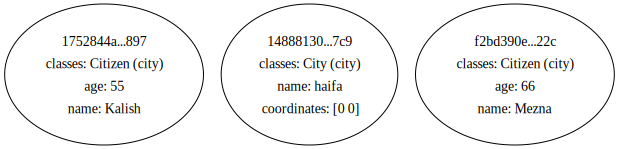

In [38]:
semantic2dot(haifa_session)

In [39]:
haifa.connect(Kalish, rel=city.hasMajor)

In [40]:
pretty_print(haifa)

- Ontology individual:
  identifier: 14888130-276a-4385-bf14-4f080f79d7c9
  type: City (city )
  superclasses: City (city ), Populated Place (city ), Geographical Place (city ), Thing (owl )
  values:  coordinates: [0 0]
           name: haifa
   |_Relationship has major (city ) (city):
     - Ontology individual of class Citizen
        identifier: 1752844a-41f9-4b74-8aa4-01ffa8611897
         age: 55
         name: Kalish


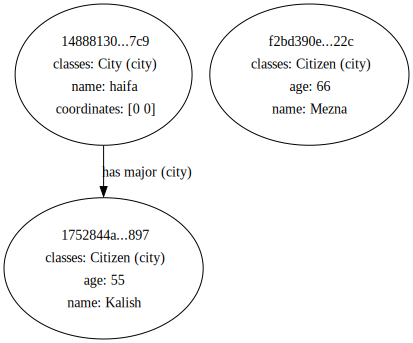

In [41]:
semantic2dot(haifa_session)

In [42]:
def triple(s=OntologyIndividual, p=OntologyRelationship, o=OntologyIndividual):
    s.connect(o, rel=p)
    return(s)

In [43]:
haifa.connect(Mezna, rel=city.hasMajor)

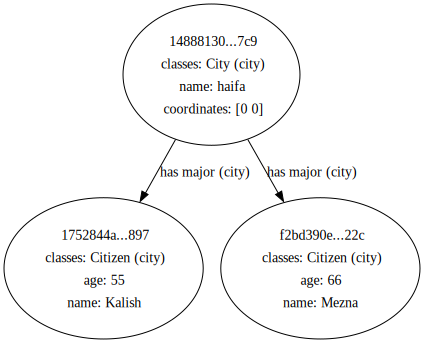

In [44]:
semantic2dot(haifa_session)

In [45]:
pretty_print(haifa)

- Ontology individual:
  identifier: 14888130-276a-4385-bf14-4f080f79d7c9
  type: City (city )
  superclasses: City (city ), Populated Place (city ), Geographical Place (city ), Thing (owl )
  values:  coordinates: [0 0]
           name: haifa
   |_Relationship has major (city ) (city):
     - Ontology individual of class Citizen
      . identifier: 1752844a-41f9-4b74-8aa4-01ffa8611897
      .  age: 55
      .  name: Kalish
     - Ontology individual of class Citizen
        identifier: f2bd390e-4211-4f59-b3c2-adf80fcae22c
         age: 66
         name: Mezna


In [46]:
neighborhoods = {
    city.Neighborhood(name=name, coordinates=coordinates)
    for name, coordinates in [
        ("The City", [47.99525, 7.84726]),
        ("Alperton", [47.99888, 7.83774]),
        ("Webmly Park", [48.00021, 7.86084]),
        ("Marylebone", [48.00779, 7.86268]),
        ("Battersea", [48.01684, 7.843]),
    ]
}

In [47]:
london = city.City(name='london', coordinates=[1,1])

In [48]:
pretty_print(london)

- Ontology individual:
  identifier: d841dc78-f120-4b28-896a-09f6f941e82e
  type: City (city )
  superclasses: City (city ), Populated Place (city ), Geographical Place (city ), Thing (owl )
  values:  coordinates: [1 1]
           name: london


In [49]:
for neighborhood in neighborhoods:
    london.connect(neighborhood, rel=city.hasPart) 

In [50]:
pretty_print(london)

- Ontology individual:
  identifier: d841dc78-f120-4b28-896a-09f6f941e82e
  type: City (city )
  superclasses: City (city ), Populated Place (city ), Geographical Place (city ), Thing (owl )
  values:  coordinates: [1 1]
           name: london
   |_Relationship has part (city ) (city):
     - Ontology individual of class Neighborhood
      . identifier: 02fc658e-fc0f-496d-bccb-477617448295
      .  coordinates: [48.01684  7.843  ]
      .  name: Battersea
     - Ontology individual of class Neighborhood
      . identifier: 2a065087-52c7-41c7-b320-3a9cc2f66351
      .  coordinates: [48.00021  7.86084]
      .  name: Webmly Park
     - Ontology individual of class Neighborhood
      . identifier: 5982099f-3dcb-4cc5-a9d3-691ad7f5061d
      .  coordinates: [47.99888  7.83774]
      .  name: Alperton
     - Ontology individual of class Neighborhood
      . identifier: 6448eb37-b10b-408f-b3eb-3a037b8ab742
      .  coordinates: [48.00779  7.86268]
      .  name: Marylebone
     - Ontology in

In [51]:
semantic2dot(core_session).render("./city_axioms.gv")

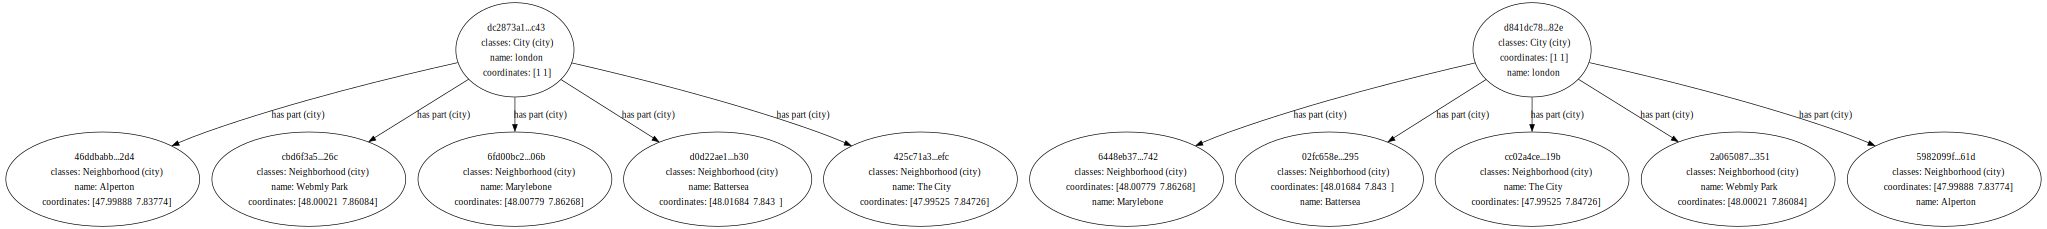

In [52]:
semantic2dot(core_session)

Now lets add Marylebone to haifa as well. 


In [53]:
print(type(neighborhoods))

<class 'set'>


In [54]:
for neighborhood in neighborhoods:
    if "Mary" in str(neighborhood.name):
        pretty_print (neighborhood)
        marylebone=neighborhood

- Ontology individual:
  identifier: 6448eb37-b10b-408f-b3eb-3a037b8ab742
  type: Neighborhood (city )
  superclasses: Neighborhood (city ), Populated Place (city ), Geographical Place (city ), Thing (owl )
  values:  coordinates: [48.00779  7.86268]
           name: Marylebone


In [55]:
pretty_print(marylebone) # just double check

- Ontology individual:
  identifier: 6448eb37-b10b-408f-b3eb-3a037b8ab742
  type: Neighborhood (city )
  superclasses: Neighborhood (city ), Populated Place (city ), Geographical Place (city ), Thing (owl )
  values:  coordinates: [48.00779  7.86268]
           name: Marylebone


In [56]:
haifa.connect(marylebone, rel=city.hasPart)

RuntimeError: Cannot connect ontology individuals belonging to a different session: 6448eb37-b10b-408f-b3eb-3a037b8ab742.Please add them to this session first using `session.add`.

In [ ]:
semantic2dot(core_session)

In [ ]:
pretty_print(london)

In [ ]:
pretty_print(haifa)

In [57]:
for neighborhood in neighborhoods:
    if "Bat" in str(neighborhood.name):
        pretty_print (neighborhood)
        bater=neighborhood

- Ontology individual:
  identifier: 02fc658e-fc0f-496d-bccb-477617448295
  type: Neighborhood (city )
  superclasses: Neighborhood (city ), Populated Place (city ), Geographical Place (city ), Thing (owl )
  values:  coordinates: [48.01684  7.843  ]
           name: Battersea


In [58]:
bater

<OntologyIndividual: 02fc658e-fc0f-496d-bccb-477617448295>

In [59]:
haifa.connect(bater, rel=city.hasPart)

RuntimeError: Cannot connect ontology individuals belonging to a different session: 02fc658e-fc0f-496d-bccb-477617448295.Please add them to this session first using `session.add`.

In [31]:
pretty_print(haifa)

- Ontology individual:
  identifier: 38bbc023-4dbe-41fb-afa0-b9bbb1f2f886
  type: City (city )
  superclasses: City (city ), Populated Place (city ), Geographical Place (city ), Thing (owl )
  values:  coordinates: [0 0]
           name: haifa
   |_Relationship has major (city ) (city):
     - Ontology individual of class Citizen
      . identifier: 058fb189-f591-4b5e-aff8-f1f97e818055
      .  age: 66
      .  name: Mezna
     - Ontology individual of class Citizen
        identifier: 70ff7156-c04d-4885-83c6-cd68521a7343
         age: 55
         name: Kalish


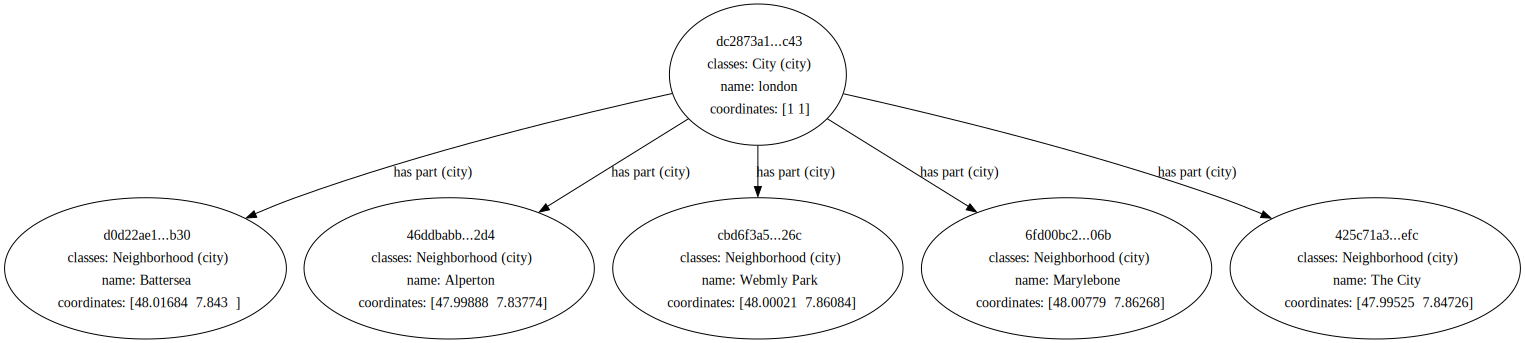

In [32]:
semantic2dot(core_session)